In [93]:
#导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [94]:
#设置LSTM的时间窗
window=1
#读取数据
df1=pd.read_csv('000001.csv',encoding='gb2312')
df1.rename(columns={'日期':'date','股票代码':'code','名称':'name','收盘价':'close','最高价':'high','最低价':'low','开盘价':'open','前收盘':'previous close','涨跌额':'change amount','涨跌幅':'change rate','成交量':'volume','成交金额':'money'},inplace=True)
df1=df1.iloc[:,3:]
df1

,close,high,low,open,previous close,change amount,change rate,volume,money
0,3570.1082,3588.0625,3544.8912,3577.6923,3576.2046,-6.0964,-0.1705,345557896,5.020000e+11
1,3576.2046,3576.2046,3526.6174,3552.9087,3550.8767,25.3279,0.7133,405348226,5.460000e+11
2,3550.8767,3556.8022,3513.1262,3530.9072,3528.6767,22.2000,0.6291,370230926,5.220000e+11
3,3528.6767,3528.6767,3484.7151,3492.1912,3502.9584,25.7183,0.7342,407995934,5.680000e+11
4,3502.9584,3511.6554,3457.2061,3474.6793,3473.0693,29.8891,0.8606,380790800,5.230000e+11
...,...,...,...,...,...,...,...,...,...
7343,120.2500,120.2500,114.5500,120.0900,114.5500,5.7000,4.9760,15,6.000000e+03
7344,114.5500,114.5500,109.1300,113.5700,109.1300,5.4200,4.9666,32,3.100000e+04
7345,109.1300,109.1300,103.7300,109.0700,104.3900,4.7400,4.5407,28,1.600000e+04
7346,104.3900,104.3900,99.9800,104.3000,99.9800,4.4100,4.4109,197,8.400000e+04


In [95]:
df1[['close','high','low','open','previous close','change amount','change rate','volume','money']] = df1[['close','high','low','open','previous close','change amount','change rate','volume','money']].astype('float32')
df1

,close,high,low,open,previous close,change amount,change rate,volume,money
0,3570.108154,3588.062500,3544.891113,3577.692383,3576.204590,-6.096400,-0.1705,345557888.0,5.020000e+11
1,3576.204590,3576.204590,3526.617432,3552.908691,3550.876709,25.327900,0.7133,405348224.0,5.460000e+11
2,3550.876709,3556.802246,3513.126221,3530.907227,3528.676758,22.200001,0.6291,370230912.0,5.220000e+11
3,3528.676758,3528.676758,3484.715088,3492.191162,3502.958496,25.718300,0.7342,407995936.0,5.680000e+11
4,3502.958496,3511.655518,3457.206055,3474.679199,3473.069336,29.889099,0.8606,380790784.0,5.230000e+11
...,...,...,...,...,...,...,...,...,...
7343,120.250000,120.250000,114.550003,120.089996,114.550003,5.700000,4.9760,15.0,6.000000e+03
7344,114.550003,114.550003,109.129997,113.570000,109.129997,5.420000,4.9666,32.0,3.100000e+04
7345,109.129997,109.129997,103.730003,109.070000,104.389999,4.740000,4.5407,28.0,1.600000e+04
7346,104.389999,104.389999,99.980003,104.300003,99.980003,4.410000,4.4109,197.0,8.400000e+04


In [96]:
#计算得出标签
record=(df1['change amount'][0:].values)>0
classification=[]
for i in record:
    if(i==True):
        classification.append(1)
    else:
        classification.append(0)
classification
df1['label']=classification    
df1

,close,high,low,open,previous close,change amount,change rate,volume,money,label
0,3570.108154,3588.062500,3544.891113,3577.692383,3576.204590,-6.096400,-0.1705,345557888.0,5.020000e+11,0
1,3576.204590,3576.204590,3526.617432,3552.908691,3550.876709,25.327900,0.7133,405348224.0,5.460000e+11,1
2,3550.876709,3556.802246,3513.126221,3530.907227,3528.676758,22.200001,0.6291,370230912.0,5.220000e+11,1
3,3528.676758,3528.676758,3484.715088,3492.191162,3502.958496,25.718300,0.7342,407995936.0,5.680000e+11,1
4,3502.958496,3511.655518,3457.206055,3474.679199,3473.069336,29.889099,0.8606,380790784.0,5.230000e+11,1
...,...,...,...,...,...,...,...,...,...,...
7343,120.250000,120.250000,114.550003,120.089996,114.550003,5.700000,4.9760,15.0,6.000000e+03,1
7344,114.550003,114.550003,109.129997,113.570000,109.129997,5.420000,4.9666,32.0,3.100000e+04,1
7345,109.129997,109.129997,103.730003,109.070000,104.389999,4.740000,4.5407,28.0,1.600000e+04,1
7346,104.389999,104.389999,99.980003,104.300003,99.980003,4.410000,4.4109,197.0,8.400000e+04,1


In [97]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df1 = pd.DataFrame(df0, columns=df1.columns)
df1

,close,high,low,open,previous close,change amount,change rate,volume,money,label
0,0.579119,0.579025,0.580176,0.584033,0.580137,0.347135,0.133346,4.031556e-01,3.832061e-01,0.0
1,0.580137,0.577056,0.577102,0.579876,0.575910,0.378429,0.140610,4.729118e-01,4.167939e-01,1.0
2,0.575910,0.573836,0.574833,0.576185,0.572205,0.375314,0.139918,4.319411e-01,3.984733e-01,1.0
3,0.572205,0.569167,0.570054,0.569691,0.567913,0.378817,0.140782,4.760008e-01,4.335878e-01,1.0
4,0.567913,0.566341,0.565426,0.566753,0.562925,0.382971,0.141821,4.442611e-01,3.992366e-01,1.0
...,...,...,...,...,...,...,...,...,...,...
7343,0.003383,0.003365,0.003156,0.004033,0.002432,0.358882,0.175647,0.000000e+00,0.000000e+00,1.0
7344,0.002432,0.002419,0.002244,0.002939,0.001527,0.358604,0.175570,1.983357e-08,1.908397e-08,1.0
7345,0.001527,0.001519,0.001336,0.002184,0.000736,0.357926,0.172069,1.516684e-08,7.633588e-09,1.0
7346,0.000736,0.000732,0.000705,0.001384,0.000000,0.357598,0.171002,2.123358e-07,5.954198e-08,1.0


In [98]:
#构建LSTM输入
stock=df1
seq_len=window
input_size=len(df1.iloc[1,:])
amount_of_features = len(stock.columns)#有几列
data = stock.values 
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
result = np.array(result)
row = round(0.8* result.shape[0])#划分训练集测试集
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]

X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  
X_train.shape,X_test.shape

((5877, 1, 10), (1469, 1, 10))

In [99]:
#建立LSTM模型 训练
d = 0.01
model = Sequential()
model.add(LSTM(64, input_shape=(window, input_size), return_sequences=False))
model.add(Dropout(d))
model.add(Dense(32,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch = 1000, batch_size = 200,validation_data=(X_test, y_test)) #训练模型1000次

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys
E:\anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 5877 samples, validate on 1469 samples
Epoch 1/100
5877/5877 [==============================] - 1s 208us/step - loss: 0.6924 - accuracy: 0.5283 - val_loss: 0.6918 - val_accuracy: 0.5269
Epoch 2/100
5877/5877 [==============================] - 0s 20us/step - loss: 0.6911 - accuracy: 0.5290 - val_loss: 0.6911 - val_accuracy: 0.5269
Epoch 3/100
5877/5877 [==============================] - 0s 22us/step - loss: 0.6905 - accuracy: 0.5290 - val_loss: 0.6914 - val_accuracy: 0.5269
Epoch 4/100
5877/5877 [==============================] - 0s 20us/step - loss: 0.6901 - accuracy: 0.5290 - val_loss: 0.6918 - val_accuracy: 0.5269
Epoch 5/100
5877/5877 [==============================] - 0s 17us/step - loss: 0.6897 - accuracy: 0.5290 - val_loss: 0.6922 - val_accuracy: 0.5269
Epoch 6/100
5877/5877 [==============================] - 0s 17us/step - loss: 0.6892 - accuracy: 0.5290 - val_loss: 0.6929 - val_accuracy: 0.5269
Epoch 7/100
5877/5877 [==============================] - 0s 17us/step - los

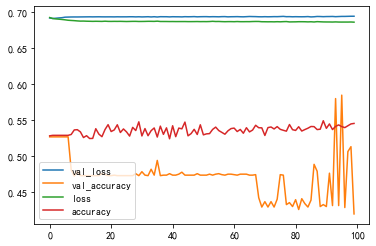

In [100]:
#画出迭代曲线
pd.DataFrame(model.history.history).plot()

In [101]:
#在测试集上的拟合结果
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
y_test_predict>0.5
y_test_predict=[int(i) for i in y_test_predict>0.5]
y_test_predict=np.array(y_test_predict)
from sklearn import metrics
print("精确度等指标：")
print(metrics.classification_report(y_test,y_test_predict))
print("混淆矩阵：")
print(metrics.confusion_matrix(y_test,y_test_predict))

精确度等指标：
              precision    recall  f1-score   support

         0.0       0.43      0.75      0.55       695
         1.0       0.36      0.13      0.19       774

    accuracy                           0.42      1469
   macro avg       0.40      0.44      0.37      1469
weighted avg       0.39      0.42      0.36      1469

混淆矩阵：
[[518 177]
 [675  99]]


In [102]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
y_train_predict>0.5
y_train_predict=[int(i) for i in y_train_predict>0.5]
y_train_predict=np.array(y_train_predict)
from sklearn import metrics
print("精确度等指标：")
print(metrics.classification_report(y_train,y_train_predict))
print("混淆矩阵：")
print(metrics.confusion_matrix(y_train,y_train_predict))

精确度等指标：
              precision    recall  f1-score   support

         0.0       0.52      0.55      0.53      2768
         1.0       0.58      0.54      0.56      3109

    accuracy                           0.55      5877
   macro avg       0.55      0.55      0.55      5877
weighted avg       0.55      0.55      0.55      5877

混淆矩阵：
[[1531 1237]
 [1427 1682]]
